# Markov Chains: Basic Concepts 


```{index} single: Markov Chains: Basic Concepts and Stationarity
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install quantecon

## Overview

Markov chains provide  a way to model situations in which  the past casts shadows on the future.

By this we mean that observing measurements about a present situation can help us forecast future situations.

This can be possible when there are statistical dependencies among measurements of something taken at different points of time.

For example,

* inflation next year might co-vary  with inflation this year
* unemployment next month might co-vary with unemployment this month


Markov chains are a workhorse for economics and finance.

The theory of Markov chains is beautiful and provides many insights into
probability and dynamics.

In this  lecture, we will

* review some of the key ideas from the theory of Markov chains and
* show how Markov chains appear in some economic applications.

Let's start with some standard imports:

In [2]:
import matplotlib.pyplot as plt
import quantecon as qe
import numpy as np
import networkx as nx
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Definitions and examples

In this section we provide some definitions and  elementary examples.

(finite_dp_stoch_mat)=
### Stochastic matrices

Recall that a **probability mass function** over $n$ possible outcomes is a
nonnegative $n$-vector $p$ that sums to one.

For example, $p = (0.2, 0.2, 0.6)$ is a probability mass function over $3$ outcomes.

A **stochastic matrix** (or **Markov matrix**)  is an $n \times n$ square matrix $P$
such that each row of $P$ is a probability mass function over $n$ outcomes.

In other words,

1. each element of $P$ is nonnegative, and
1. each row of $P$ sums to one

If $P$ is a stochastic matrix, then so is the $k$-th power $P^k$ for all $k \in \mathbb N$.

You are asked to check this in {ref}`an exercise <mc1_ex_3>` below.


### Markov chains

Now we can introduce Markov chains.

Before defining a Markov chain rigorously, we'll  give some examples.


(mc_eg2)=
#### Example 1

From  US unemployment data, Hamilton {cite}`Hamilton2005` estimated the following dynamics.

```{image} /_static/lecture_specific/markov_chains_I/Hamilton.png
:name: mc_hamilton
:align: center

```

Here there are three **states**

* "ng" represents normal growth
* "mr" represents mild recession
* "sr" represents severe recession

The arrows represent transition probabilities over one month.

For example, the arrow from mild recession to normal growth has 0.145 next to it.

This tells us that, according to past data, there is a 14.5% probability of transitioning from mild recession to normal growth in one month.

The arrow from normal growth back to normal growth tells us that there is a
97% probability of transitioning from normal growth to normal growth (staying
in the same state).

Note that these are conditional probabilities --- the probability of
transitioning from one state to another (or staying at the same one) conditional on the
current state.

To make the problem easier to work with numerically, let's convert states to
numbers.

In particular, we agree that

* state 0 represents normal growth
* state 1 represents mild recession
* state 2 represents severe recession

Let $X_t$ record the value of the state at time $t$.

Now we can write the statement "there is a 14.5% probability of transitioning from mild recession to normal growth in one month" as

$$
    \mathbb P\{X_{t+1} = 0 \,|\, X_t = 1\} = 0.145
$$

We can collect all of these conditional probabilities into a matrix, as follows

$$
P =
\begin{bmatrix}
0.971 & 0.029 & 0 \\
0.145 & 0.778 & 0.077 \\
0 & 0.508 & 0.492
\end{bmatrix}
$$

Notice that $P$ is a stochastic matrix.

Now we have the following relationship

$$
    P(i,j)
    = \mathbb P\{X_{t+1} = j \,|\, X_t = i\}
$$

This holds for any $i,j$ between 0 and 2.

In particular, $P(i,j)$ is the
     probability of transitioning from state $i$ to state $j$ in one month.




(mc_eg1)=
#### Example 2

Consider a worker who, at any given time $t$, is either unemployed (state 0)
or employed (state 1).

Suppose that, over a one-month period,

1. the unemployed worker finds a job with probability $\alpha \in (0, 1)$.
1. the employed worker loses her job and becomes unemployed with probability $\beta \in (0, 1)$.

Given the above information, we can write out the transition probabilities in matrix form as

```{math}
:label: p_unempemp

P =
\begin{bmatrix}
    1 - \alpha & \alpha \\
    \beta & 1 - \beta
\end{bmatrix}
```

For example,

$$
\begin{aligned}
    P(0,1)
        & =
        \text{ probability of transitioning from state $0$ to state $1$ in one month}
        \\
        & =
        \text{ probability finding a job next month}
        \\
        & = \alpha
\end{aligned}
$$

Suppose we can estimate the values $\alpha$ and $\beta$.

Then we can address a range of questions, such as

* What is the average duration of unemployment?
* Over the long-run, what fraction of the time does a worker find herself unemployed?
* Conditional on employment, what is the probability of becoming unemployed at least once over the next 12 months?

We'll cover some of these applications below.

(mc_eg3)=
#### Example 3

Imam and Temple {cite}`imampolitical` categorize political institutions into
three types: democracy $\text{(D)}$, autocracy $\text{(A)}$, and an intermediate
state called anocracy $\text{(N)}$.

Each institution can have two potential development regimes: collapse $\text{(C)}$ and growth $\text{(G)}$. This results in six possible states: $\text{DG, DC, NG, NC, AG}$ and $\text{AC}$.

Imam and Temple {cite}`imampolitical` estimate the following transition
probabilities:


$$
P :=
\begin{bmatrix}
0.86 & 0.11 & 0.03 & 0.00 & 0.00 & 0.00 \\
0.52 & 0.33 & 0.13 & 0.02 & 0.00 & 0.00 \\
0.12 & 0.03 & 0.70 & 0.11 & 0.03 & 0.01 \\
0.13 & 0.02 & 0.35 & 0.36 & 0.10 & 0.04 \\
0.00 & 0.00 & 0.09 & 0.11 & 0.55 & 0.25 \\
0.00 & 0.00 & 0.09 & 0.15 & 0.26 & 0.50
\end{bmatrix}
$$

In [3]:
nodes = ['DG', 'DC', 'NG', 'NC', 'AG', 'AC']
P = [[0.86, 0.11, 0.03, 0.00, 0.00, 0.00],
     [0.52, 0.33, 0.13, 0.02, 0.00, 0.00],
     [0.12, 0.03, 0.70, 0.11, 0.03, 0.01],
     [0.13, 0.02, 0.35, 0.36, 0.10, 0.04],
     [0.00, 0.00, 0.09, 0.11, 0.55, 0.25],
     [0.00, 0.00, 0.09, 0.15, 0.26, 0.50]]

Here is a visualization, with darker colors indicating higher probability.

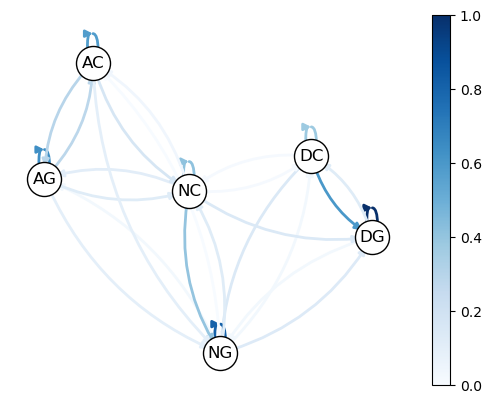

In [4]:
G = nx.MultiDiGraph()

for start_idx, node_start in enumerate(nodes):
    for end_idx, node_end in enumerate(nodes):
        value = P[start_idx][end_idx]
        if value != 0:
            G.add_edge(node_start,node_end, weight=value)

pos = nx.spring_layout(G, seed=10)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, node_size=600, edgecolors='black', node_color='white')
nx.draw_networkx_labels(G, pos)

arc_rad = 0.2

edges = nx.draw_networkx_edges(G, pos, ax=ax, connectionstyle=f'arc3, rad = {arc_rad}', edge_cmap=cm.Blues, width=2,
    edge_color=[G[nodes[0]][nodes[1]][0]['weight'] for nodes in G.edges])

pc = mpl.collections.PatchCollection(edges, cmap=cm.Blues)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()

Looking at the data, we see that democracies tend to have longer-lasting growth
regimes compared to autocracies (as indicated by the lower probability of
transitioning from growth to growth in autocracies).

We can also find a higher probability from collapse to growth in democratic regimes.


### Defining Markov chains


So far we've given examples of Markov chains but we haven't defined them. 

Let's do that now. 

To begin, let $S$ be a finite set $\{x_1, \ldots, x_n\}$ with $n$ elements.

The set $S$ is called the **state space** and $x_1, \ldots, x_n$ are the **state values**.

A **distribution** $\psi$ on $S$ is a probability mass function of length $n$, where $\psi(i)$ is the amount of probability allocated to state $x_i$.

A **Markov chain** $\{X_t\}$ on $S$ is a sequence of random variables taking values in $S$
that have the **Markov property**.

This means that, for any date $t$ and any state $y \in S$,

```{math}
:label: fin_markov_mp

\mathbb P \{ X_{t+1} = y  \,|\, X_t \}
= \mathbb P \{ X_{t+1}  = y \,|\, X_t, X_{t-1}, \ldots \}
```

This means that once we know the current state $X_t$,  adding knowledge of earlier states $X_{t-1}, X_{t-2}$ provides no additional information about probabilities of *future* states.  

Thus, the dynamics of a Markov chain are fully determined by the set of **conditional probabilities**

```{math}
:label: mpp

P(x, y) := \mathbb P \{ X_{t+1} = y \,|\, X_t = x \}
\qquad (x, y \in S)
```

By construction,

* $P(x, y)$ is the probability of going from $x$ to $y$ in one unit of time (one step)
* $P(x, \cdot)$ is the conditional distribution of $X_{t+1}$ given $X_t = x$

We can view $P$ as a stochastic matrix where

$$
    P_{ij} = P(x_i, x_j)
    \qquad 1 \leq i, j \leq n
$$

Going the other way, if we take a stochastic matrix $P$, we can generate a Markov
chain $\{X_t\}$ as follows:

* draw $X_0$ from a distribution $\psi_0$ on $S$
* for each $t = 0, 1, \ldots$, draw $X_{t+1}$ from $P(X_t,\cdot)$

By construction, the resulting process satisfies {eq}`mpp`.




## Simulation

```{index} single: Markov Chains; Simulation
```

A good way to study Markov chains is to simulate them.

Let's start by doing this ourselves and then look at libraries that can help
us.

In these exercises, we'll take the state space to be $S = 0,\ldots, n-1$.

(We start at $0$ because Python arrays are indexed from $0$.)


### Writing our own simulation code

To simulate a Markov chain, we need

1. a stochastic matrix $P$ and
1. a probability mass function $\psi_0$ of length $n$ from which to draw an initial realization of $X_0$.

The Markov chain is then constructed as follows:

1. At time $t=0$, draw a realization of $X_0$ from the distribution $\psi_0$.
1. At each subsequent time $t$, draw a realization of the new state $X_{t+1}$ from $P(X_t, \cdot)$.

(That is, draw from row $X_t$ of $P$.)

To implement this simulation procedure, we need a method for generating draws
from a discrete distribution.

For this task, we'll use `random.draw` from [QuantEcon.py](http://quantecon.org/quantecon-py).

To use `random.draw`, we first need to convert the probability mass function
to a cumulative distribution

In [5]:
ψ_0 = (0.3, 0.7)           # probabilities over {0, 1}
cdf = np.cumsum(ψ_0)       # convert into cumulative distribution
qe.random.draw(cdf, 5)   # generate 5 independent draws from ψ

array([1, 1, 0, 0, 1])

We'll write our code as a function that accepts the following three arguments

* A stochastic matrix `P`.
* An initial distribution `ψ_0`.
* A positive integer `ts_length` representing the length of the time series the function should return.

In [6]:
def mc_sample_path(P, ψ_0=None, ts_length=1_000):

    # set up
    P = np.asarray(P)
    X = np.empty(ts_length, dtype=int)

    # Convert each row of P into a cdf
    P_dist = np.cumsum(P, axis=1)  # Convert rows into cdfs

    # draw initial state, defaulting to 0
    if ψ_0 is not None:
        X_0 = qe.random.draw(np.cumsum(ψ_0))
    else:
        X_0 = 0

    # simulate
    X[0] = X_0
    for t in range(ts_length - 1):
        X[t+1] = qe.random.draw(P_dist[X[t], :])

    return X

Let's see how it works using the small matrix

In [7]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

Here's a short time series.

In [8]:
mc_sample_path(P, ψ_0=(1.0, 0.0), ts_length=10)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

It can be shown that for a long series drawn from `P`, the fraction of the
sample that takes value 0 will be about 0.25.

(We will explain why {ref}`later <ergodicity>`.)

Moreover, this is true regardless of the initial distribution from which
$X_0$ is drawn.

The following code illustrates this

In [9]:
X = mc_sample_path(P, ψ_0=(0.1, 0.9), ts_length=1_000_000)
np.mean(X == 0)

0.250059

You can try changing the initial distribution to confirm that the output is
always close to 0.25 (for the `P` matrix above).


### Using QuantEcon's routines

[QuantEcon.py](http://quantecon.org/quantecon-py) has routines for handling Markov chains, including simulation.

Here's an illustration using the same $P$ as the preceding example

In [10]:
mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=1_000_000)
np.mean(X == 0)

0.250509

The `simulate` routine is faster (because it is [JIT compiled](https://python-programming.quantecon.org/numba.html#numba-link)).

In [11]:
%time mc_sample_path(P, ts_length=1_000_000) # Our homemade code version

CPU times: user 1.11 s, sys: 0 ns, total: 1.11 s
Wall time: 1.11 s


array([0, 1, 1, ..., 0, 1, 0])

In [12]:
%time mc.simulate(ts_length=1_000_000) # qe code version

CPU times: user 14.8 ms, sys: 149 μs, total: 14.9 ms
Wall time: 14.4 ms


array([1, 1, 1, ..., 1, 0, 1])

#### Adding state values and initial conditions

If we wish to, we can provide a specification of state values to `MarkovChain`.

These state values can be integers, floats, or even strings.

The following code illustrates

In [13]:
mc = qe.MarkovChain(P, state_values=('unemployed', 'employed'))
mc.simulate(ts_length=4, init='employed')  # Start at employed initial state

array(['employed', 'unemployed', 'employed', 'employed'], dtype='<U10')

In [14]:
mc.simulate(ts_length=4, init='unemployed')  # Start at unemployed initial state

array(['unemployed', 'employed', 'employed', 'employed'], dtype='<U10')

In [15]:
mc.simulate(ts_length=4)  # Start at randomly chosen initial state

array(['employed', 'employed', 'employed', 'unemployed'], dtype='<U10')

If we want to see indices rather than state values as outputs as  we can use

In [16]:
mc.simulate_indices(ts_length=4)

array([1, 1, 1, 1])

(mc_md)=
## Distributions over time

We learned that

1. $\{X_t\}$ is a Markov chain with stochastic matrix $P$
1. the distribution of $X_t$ is known to be $\psi_t$

What then is the distribution of $X_{t+1}$, or, more generally, of $X_{t+m}$?

To answer this, we let $\psi_t$ be the distribution of $X_t$ for $t = 0, 1, 2, \ldots$.

Our first aim is to find $\psi_{t + 1}$ given $\psi_t$ and $P$.

To begin, pick any $y \in S$.

To get the probability of being at $y$ tomorrow (at $t+1$), we account for
all ways this can happen and sum their probabilities.

This leads to

$$
\mathbb P \{X_{t+1} = y \}
   = \sum_{x \in S} \mathbb P \{ X_{t+1} = y \, | \, X_t = x \}
               \cdot \mathbb P \{ X_t = x \}
$$



(We are using the [law of total probability](https://en.wikipedia.org/wiki/Law_of_total_probability).)

Rewriting this statement in terms of  marginal and conditional probabilities gives

$$
    \psi_{t+1}(y) = \sum_{x \in S} P(x,y) \psi_t(x)
$$

There are $n$ such equations, one for each $y \in S$.

If we think of $\psi_{t+1}$ and $\psi_t$ as row vectors, these $n$ equations are summarized by the matrix expression

```{math}
:label: fin_mc_fr

\psi_{t+1} = \psi_t P
```

Thus, we postmultiply by $P$ to move a distribution forward one unit of time.

By postmultiplying $m$ times, we move a distribution forward $m$ steps into the future.

Hence, iterating on {eq}`fin_mc_fr`, the expression $\psi_{t+m} = \psi_t P^m$ is also valid --- here $P^m$ is the $m$-th power of $P$.

As a special case, we see that if $\psi_0$ is the initial distribution from
which $X_0$ is drawn, then $\psi_0 P^m$ is the distribution of
$X_m$.

This is very important, so let's repeat it

```{math}
:label: mdfmc

X_0 \sim \psi_0 \quad \implies \quad X_m \sim \psi_0 P^m
```

The general rule is that postmultiplying a distribution by $P^m$ shifts it forward $m$ units of time.

Hence the following is also valid.

```{math}
:label: mdfmc2

X_t \sim \psi_t \quad \implies \quad X_{t+m} \sim \psi_t P^m
```



(finite_mc_mstp)=
### Multiple step transition probabilities

We know that the probability of transitioning from $x$ to $y$ in
one step is $P(x,y)$.

It turns out that the probability of transitioning from $x$ to $y$ in
$m$ steps is $P^m(x,y)$, the $(x,y)$-th element of the
$m$-th power of $P$.

To see why, consider again {eq}`mdfmc2`, but now with a $\psi_t$ that puts all probability on state $x$.

Then $\psi_t$ is a vector with $1$ in position $x$ and zero elsewhere.

Inserting this into {eq}`mdfmc2`, we see that, conditional on $X_t = x$, the distribution of $X_{t+m}$ is the $x$-th row of $P^m$.

In particular

$$
\mathbb P \{X_{t+m} = y \,|\, X_t = x \} = P^m(x, y) = (x, y) \text{-th element of } P^m
$$


### Example: probability of recession

```{index} single: Markov Chains; Future Probabilities
```

Recall the stochastic matrix $P$ for recession and growth {ref}`considered above <mc_eg2>`.

Suppose that the current state is unknown --- perhaps statistics are available only at the *end* of the current month.

We guess that the probability that the economy is in state $x$ is $\psi_t(x)$ at time t.

The probability of being in recession (either mild or severe) in 6 months time is given by

$$
(\psi_t P^6)(1) + (\psi_t P^6)(2)
$$



(mc_eg1-1)=
### Example 2: cross-sectional distributions

The distributions we have been studying can be viewed either

1. as probabilities or
1. as cross-sectional frequencies that the law of large numbers leads us to anticipate for large samples.

To illustrate, recall our model of employment/unemployment dynamics for a given worker {ref}`discussed above <mc_eg1>`.

Consider a large population of workers, each of whose lifetime experience is
described by the specified dynamics, with each worker's outcomes being
realizations of processes that are statistically independent of all other
workers' processes.

Let $\psi_t$ be the current *cross-sectional* distribution over $\{ 0, 1 \}$.

The cross-sectional distribution records fractions of workers employed and unemployed at a given moment $t$.

* For example, $\psi_t(0)$ is the unemployment rate at time $t$.

What will the cross-sectional distribution be in 10 periods hence?

The answer is $\psi_t P^{10}$, where $P$ is the stochastic matrix in
{eq}`p_unempemp`.

This is because each worker's state evolves according to $P$, so
$\psi_t P^{10}$ is a [marginal distribution](https://en.wikipedia.org/wiki/Marginal_distribution)  for a single randomly selected
worker.

But when the sample is large, outcomes and probabilities are roughly equal (by an application of the law
of large numbers).

So for a very large (tending to infinite) population,
$\psi_t P^{10}$ also represents  fractions of workers in
each state.

This is exactly the cross-sectional distribution.

(stationary)=
## Stationary distributions


As seen in {eq}`fin_mc_fr`, we can shift a distribution forward one
unit of time via postmultiplication by $P$.

Some distributions are invariant under this updating process --- for example,

In [17]:
P = np.array([[0.4, 0.6],
              [0.2, 0.8]])
ψ = (0.25, 0.75)
ψ @ P

array([0.25, 0.75])

Notice that `ψ @ P` is the same as `ψ`.



Such distributions are called **stationary** or **invariant**.

(mc_stat_dd)=
Formally, a distribution $\psi^*$ on $S$ is called **stationary** for $P$ if $\psi^* P = \psi^* $.

Notice that, postmultiplying by $P$, we have $\psi^* P^2 = \psi^* P = \psi^*$.

Continuing in the same way leads to $\psi^* = \psi^* P^t$ for all $t \ge 0$.

This tells us an important fact: If the distribution of $\psi_0$ is a stationary distribution, then $\psi_t$ will have this same distribution for all $t \ge 0$.

The following theorem is proved in Chapter 4 of {cite}`sargent2023economic` and numerous other sources.

```{prf:theorem}
:label: unique_stat

Every stochastic matrix $P$ has at least one stationary distribution.
```

Note that there can be many stationary distributions corresponding to a given
stochastic matrix $P$.

* For example, if $P$ is the identity matrix, then all distributions on $S$ are stationary.

To get uniqueness, we need the Markov chain to "mix around," so that the state
doesn't get stuck in some part of the state space.

This gives some intuition for the following theorem.


```{prf:theorem}
:label: mc_po_conv_thm

If $P$ is everywhere positive, then $P$ has exactly one stationary
distribution.
```

We will come back to this when we introduce irreducibility in the {doc}`next lecture <markov_chains_II>` on Markov chains.



### Example

Recall our model of the employment/unemployment dynamics of a particular worker {ref}`discussed above <mc_eg1>`.

If $\alpha \in (0,1)$ and $\beta \in (0,1)$, then the transition matrix is everywhere positive.

Let $\psi^* = (p, 1-p)$ be the stationary distribution, so that $p$
corresponds to unemployment (state 0).

Using $\psi^* = \psi^* P$ and a bit of algebra yields

$$
    p = \frac{\beta}{\alpha + \beta}
$$

This is, in some sense, a steady state probability of unemployment.

Not surprisingly it tends to zero as $\beta \to 0$, and to one as $\alpha \to 0$.






### Calculating stationary distributions

A stable algorithm for computing stationary distributions is implemented in [QuantEcon.py](http://quantecon.org/quantecon-py).

Here's an example

In [18]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

mc = qe.MarkovChain(P)
mc.stationary_distributions  # Show all stationary distributions

array([[0.25, 0.75]])

### Asymptotic stationarity

Consider an everywhere positive stochastic matrix with unique stationary distribution $\psi^*$.

Sometimes the distribution $\psi_t = \psi_0 P^t$ of $X_t$ converges to $\psi^*$ regardless of $\psi_0$.

For example, we have the following result

(strict_stationary)=
```{prf:theorem}
:label: mc_gs_thm

If there exists an integer $m$ such that all entries of $P^m$ are
strictly positive, then

$$
    \psi_0 P^t \to \psi^*
    \quad \text{ as } t \to \infty
$$

where $\psi^*$ is the unique stationary distribution.
```

This situation is often referred to as **asymptotic stationarity** or **global stability**.

A proof of the theorem can be found in Chapter 4 of {cite}`sargent2023economic`, as well as many other sources.





(hamilton)=
#### Example: Hamilton's chain

Hamilton's chain satisfies the conditions of the theorem because $P^2$ is everywhere positive:

In [19]:
P = np.array([[0.971, 0.029, 0.000],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]])
P @ P

array([[0.947046, 0.050721, 0.002233],
       [0.253605, 0.648605, 0.09779 ],
       [0.07366 , 0.64516 , 0.28118 ]])

Let's pick an initial distribution $\psi_1, \psi_2, \psi_3$ and trace out the sequence of distributions $\psi_i P^t$ for $t = 0, 1, 2, \ldots$, for $i=1, 2, 3$.

First, we write a function to iterate the sequence of distributions for `ts_length` period

In [20]:
def iterate_ψ(ψ_0, P, ts_length):
    n = len(P)
    ψ_t = np.empty((ts_length, n))
    ψ_t[0 ]= ψ_0
    for t in range(1, ts_length):
        ψ_t[t] = ψ_t[t-1] @ P
    return ψ_t

Now we plot the sequence

In [21]:
ψ_1 = (0.0, 0.0, 1.0)
ψ_2 = (1.0, 0.0, 0.0)
ψ_3 = (0.0, 1.0, 0.0)                   # Three initial conditions
colors = ['blue','red', 'green']   # Different colors for each initial point

# Define the vertices of the unit simplex
v = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 0]])

# Define the faces of the unit simplex
faces = [
    [v[0], v[1], v[2]],
    [v[0], v[1], v[3]],
    [v[0], v[2], v[3]],
    [v[1], v[2], v[3]]
]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def update(n):    
    ax.clear()
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.view_init(45, 45)
    
    simplex = Poly3DCollection(faces, alpha=0.03)
    ax.add_collection3d(simplex)
    
    for idx, ψ_0 in enumerate([ψ_1, ψ_2, ψ_3]):
        ψ_t = iterate_ψ(ψ_0, P, n+1)
        
        for i, point in enumerate(ψ_t):
            ax.scatter(point[0], point[1], point[2], color=colors[idx], s=60, alpha=(i+1)/len(ψ_t))
            
    mc = qe.MarkovChain(P)
    ψ_star = mc.stationary_distributions[0]
    ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='yellow', s=60)
    
    return fig,

anim = FuncAnimation(fig, update, frames=range(20), blit=False, repeat=False)
plt.close()
HTML(anim.to_jshtml())

Here

* $P$ is the stochastic matrix for recession and growth {ref}`considered above <mc_eg2>`.
* The red, blue and green dots are initial marginal probability distributions  $\psi_1, \psi_2, \psi_3$, each of which is represented as a vector in $\mathbb R^3$.
* The transparent dots are the marginal distributions $\psi_i P^t$ for $t = 1, 2, \ldots$, for $i=1,2,3.$.
* The yellow dot is $\psi^*$.

You might like to try experimenting with different initial conditions.




#### Example: failure of convergence


Consider the periodic chain with stochastic matrix

$$
P = 
\begin{bmatrix}
    0 & 1 \\
    1 & 0 \\
\end{bmatrix}
$$

This matrix does not satisfy the conditions of 
{ref}`strict_stationary` because, as you can readily check, 

* $P^m = P$ when $m$ is odd and 
* $P^m = I$, the identity matrix, when $m$ is even.

Hence there is no $m$ such that all elements of $P^m$ are strictly positive.

Moreover, we can see that global stability does not hold.

For instance, if we start at $\psi_0 = (1,0)$, then $\psi_m = \psi_0 P^m$ is $(1, 0)$ when $m$ is even and $(0,1)$ when $m$ is odd.

We can see similar phenomena in higher dimensions.

The next figure illustrates this for a periodic Markov chain with three states.

In [22]:
ψ_1 = (0.0, 0.0, 1.0)
ψ_2 = (0.5, 0.5, 0.0)
ψ_3 = (0.25, 0.25, 0.5)
ψ_4 = (1/3, 1/3, 1/3)

P = np.array([[0.0, 1.0, 0.0],
              [0.0, 0.0, 1.0],
              [1.0, 0.0, 0.0]])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['red','yellow', 'green', 'blue']  # Different colors for each initial point

# Define the vertices of the unit simplex
v = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 0]])

# Define the faces of the unit simplex
faces = [
    [v[0], v[1], v[2]],
    [v[0], v[1], v[3]],
    [v[0], v[2], v[3]],
    [v[1], v[2], v[3]]
]

def update(n):
    ax.clear()
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.view_init(45, 45)
    
    # Plot the 3D unit simplex as planes
    simplex = Poly3DCollection(faces,alpha=0.05)
    ax.add_collection3d(simplex)
    
    for idx, ψ_0 in enumerate([ψ_1, ψ_2, ψ_3, ψ_4]):
        ψ_t = iterate_ψ(ψ_0, P, n+1)
        
        point = ψ_t[-1]
        ax.scatter(point[0], point[1], point[2], color=colors[idx], s=60)
        points = np.array(ψ_t)
        ax.plot(points[:, 0], points[:, 1], points[:, 2], color=colors[idx],linewidth=0.75)
    
    return fig,

anim = FuncAnimation(fig, update, frames=range(20), blit=False, repeat=False)
plt.close()
HTML(anim.to_jshtml())

This animation demonstrates the behavior of an irreducible and periodic stochastic matrix.

The red, yellow, and green dots represent different initial probability distributions.

The blue dot represents the unique stationary distribution.

Unlike Hamilton’s Markov chain, these initial distributions do not converge to the unique stationary distribution.

Instead, they cycle periodically around the probability simplex, illustrating that asymptotic stability fails.


(finite_mc_expec)=
## Computing expectations

```{index} single: Markov Chains; Forecasting Future Values
```

We sometimes want to  compute mathematical  expectations of functions of $X_t$ of the form

```{math}
:label: mc_une

\mathbb E [ h(X_t) ]
```

and conditional expectations such as

```{math}
:label: mc_cce

\mathbb E [ h(X_{t + k})  \mid X_t = x]
```

where

* $\{X_t\}$ is a Markov chain generated by $n \times n$ stochastic matrix $P$.
* $h$ is a given function, which, in terms of matrix
  algebra, we'll think of as the column vector

$$
h =
\begin{bmatrix}
    h(x_1) \\
    \vdots \\
    h(x_n)
\end{bmatrix}.
$$

Computing the unconditional expectation {eq}`mc_une` is easy.


We just sum over the marginal  distribution  of $X_t$ to get

$$
\mathbb E [ h(X_t) ]
= \sum_{x \in S} (\psi P^t)(x) h(x)
$$

Here $\psi$ is the distribution of $X_0$.

Since $\psi$ and hence $\psi P^t$ are row vectors, we can also
write this as

$$
\mathbb E [ h(X_t) ]
=  \psi P^t h
$$

For the conditional expectation {eq}`mc_cce`, we need to sum over
the conditional distribution of $X_{t + k}$ given $X_t = x$.

We already know that this is $P^k(x, \cdot)$, so

```{math}
:label: mc_cce2

\mathbb E [ h(X_{t + k})  \mid X_t = x]
= (P^k h)(x)
```

### Expectations of geometric sums

Sometimes we want to compute the mathematical expectation of a geometric sum, such as
$\sum_t \beta^t h(X_t)$.

In view of the preceding discussion, this is

$$
\mathbb{E}
    \left[
        \sum_{j=0}^\infty \beta^j h(X_{t+j}) \mid X_t
        = x
    \right]
    = x + \beta (Ph)(x) + \beta^2 (P^2 h)(x) + \cdots
$$

By the {ref}`Neumann series lemma <la_neumann>`, this sum can be calculated using

$$
    I + \beta P + \beta^2 P^2 + \cdots = (I - \beta P)^{-1}
$$

The vector $P^k h$ stores the conditional expectation $\mathbb E [ h(X_{t + k})  \mid X_t = x]$ over all $x$.


```{exercise}
:label: mc1_ex_1

Imam and Temple {cite}`imampolitical` used a three-state transition matrix to describe the transition of three states of a regime: growth, stagnation, and collapse

$$
P :=
\begin{bmatrix}
    0.68 & 0.12 & 0.20 \\
    0.50 & 0.24 & 0.26 \\
    0.36 & 0.18 & 0.46
\end{bmatrix}
$$

where rows, from top to down, correspond to growth, stagnation, and collapse.

In this exercise,

1. visualize the transition matrix and show this process is asymptotically stationary
1. calculate the stationary distribution using simulations
1. visualize the dynamics of  $(\psi_0 P^t)(i)$ where $t \in 0, ..., 25$ and compare the convergent path with the previous transition matrix

Compare your solution to the paper.
```

```{solution-start} mc1_ex_1
:class: dropdown
```

Solution 1:

```{image} /_static/lecture_specific/markov_chains_I/Temple.png
:name: mc_temple
:align: center

```

Since the matrix is everywhere positive, there is a unique stationary distribution $\psi^*$ such that $\psi_t\to \psi^*$ as $t\to \infty$.

Solution 2:

One simple way to calculate the stationary distribution is to take the power of the transition matrix as we have shown before

In [23]:
P = np.array([[0.68, 0.12, 0.20],
              [0.50, 0.24, 0.26],
              [0.36, 0.18, 0.46]])
P_power = np.linalg.matrix_power(P, 20)
P_power

array([[0.56145769, 0.15565164, 0.28289067],
       [0.56145769, 0.15565164, 0.28289067],
       [0.56145769, 0.15565164, 0.28289067]])

Note that rows of the transition matrix converge to the stationary distribution.

In [24]:
ψ_star_p = P_power[0]
ψ_star_p

array([0.56145769, 0.15565164, 0.28289067])

In [25]:
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ψ_star

array([0.56145769, 0.15565164, 0.28289067])

```{solution-end}
```

````{exercise}
:label: mc1_ex_2

We discussed the six-state transition matrix estimated by Imam & Temple {cite}`imampolitical` [before](mc_eg3).

```python
nodes = ['DG', 'DC', 'NG', 'NC', 'AG', 'AC']
P = [[0.86, 0.11, 0.03, 0.00, 0.00, 0.00],
     [0.52, 0.33, 0.13, 0.02, 0.00, 0.00],
     [0.12, 0.03, 0.70, 0.11, 0.03, 0.01],
     [0.13, 0.02, 0.35, 0.36, 0.10, 0.04],
     [0.00, 0.00, 0.09, 0.11, 0.55, 0.25],
     [0.00, 0.00, 0.09, 0.15, 0.26, 0.50]]
```

In this exercise,

1. show this process is asymptotically stationary without simulation
2. simulate and visualize the dynamics starting with a uniform distribution across states (each state will have a probability of 1/6)
3. change the initial distribution to P(DG) = 1, while all other states have a probability of 0
````

```{solution-start} mc1_ex_2
:class: dropdown
```

Solution 1:

Although $P$ is not every positive, $P^m$ when $m=3$ is everywhere positive.

In [26]:
P = np.array([[0.86, 0.11, 0.03, 0.00, 0.00, 0.00],
              [0.52, 0.33, 0.13, 0.02, 0.00, 0.00],
              [0.12, 0.03, 0.70, 0.11, 0.03, 0.01],
              [0.13, 0.02, 0.35, 0.36, 0.10, 0.04],
              [0.00, 0.00, 0.09, 0.11, 0.55, 0.25],
              [0.00, 0.00, 0.09, 0.15, 0.26, 0.50]])

np.linalg.matrix_power(P,3)

array([[0.764927, 0.133481, 0.085949, 0.011481, 0.002956, 0.001206],
       [0.658861, 0.131559, 0.161367, 0.031703, 0.011296, 0.005214],
       [0.291394, 0.057788, 0.439702, 0.113408, 0.062707, 0.035001],
       [0.272459, 0.051361, 0.365075, 0.132207, 0.108152, 0.070746],
       [0.064129, 0.012533, 0.232875, 0.154385, 0.299243, 0.236835],
       [0.072865, 0.014081, 0.244139, 0.160905, 0.265846, 0.242164]])

So it satisfies the requirement.

Solution 2:

We find the distribution $\psi$ converges to the stationary distribution quickly regardless of the initial distributions

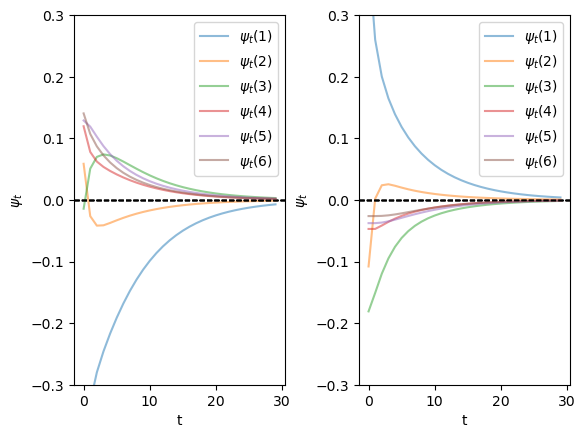

In [27]:
ts_length = 30
num_distributions = 20
nodes = ['DG', 'DC', 'NG', 'NC', 'AG', 'AC']

# Get parameters of transition matrix
n = len(P)
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ψ_0 = np.array([[1/6 for i in range(6)],
                [0 if i != 0 else 1 for i in range(6)]])
## Draw the plot
fig, axes = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0.35)
for idx in range(2):
    ψ_t = iterate_ψ(ψ_0[idx], P, ts_length)
    for i in range(n):
        axes[idx].plot(ψ_t[:, i] - ψ_star[i], alpha=0.5, label=fr'$\psi_t({i+1})$')
        axes[idx].set_ylim([-0.3, 0.3])
        axes[idx].set_xlabel('t')
        axes[idx].set_ylabel(fr'$\psi_t$')
        axes[idx].legend()
        axes[idx].axhline(0, linestyle='dashed', lw=1, color = 'black')

plt.show()

```{solution-end}
```

```{exercise}
:label: mc1_ex_3
Prove the following: If $P$ is a stochastic matrix, then so is the $k$-th
power $P^k$ for all $k \in \mathbb N$.
```


```{solution-start} mc1_ex_3
:class: dropdown
```

Suppose that $P$ is stochastic and, moreover, that $P^k$ is
stochastic for some integer $k$.

We will prove that $P^{k+1} = P P^k$ is also stochastic.

(We are doing proof by induction --- we assume the claim is true at $k$ and
now prove it is true at $k+1$.)

To see this, observe that, since $P^k$ is stochastic and the product of
nonnegative matrices is nonnegative, $P^{k+1} = P P^k$ is nonnegative.

Also, if $\mathbf 1$ is a column vector of ones, then, since $P^k$ is stochastic we
have $P^k \mathbf 1 = \mathbf 1$ (rows sum to one).

Therefore $P^{k+1} \mathbf 1 = P P^k \mathbf 1 = P \mathbf 1 = \mathbf 1$

The proof is done.

```{solution-end}
```